# Ukraine and Russia war Twitter

SENTIMENTAL ANALYSIS

In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 152.1/152.1 kB 603.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [5]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Russia Ukraine  War Dataset\filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

In [6]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [7]:
data = data[["username", "tweet", "language"]]

In [8]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [9]:
data["language"].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

In [10]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


This code defines a function called clean which takes a text string as input and applies various preprocessing steps to clean it. The function first converts the text to lowercase and removes any URLs, HTML tags, and punctuation marks. It then removes any digits, and splits the text into words. It removes any stop words (common words like "the", "and", "a", etc. that are not useful for analysis), and applies stemming to the remaining words (reducing them to their base form) using the SnowballStemmer from the NLTK library. Finally, it joins the list of words back into a single string and returns it. The code applies this clean function to each tweet in the "tweet" column of a dataframe called "data".

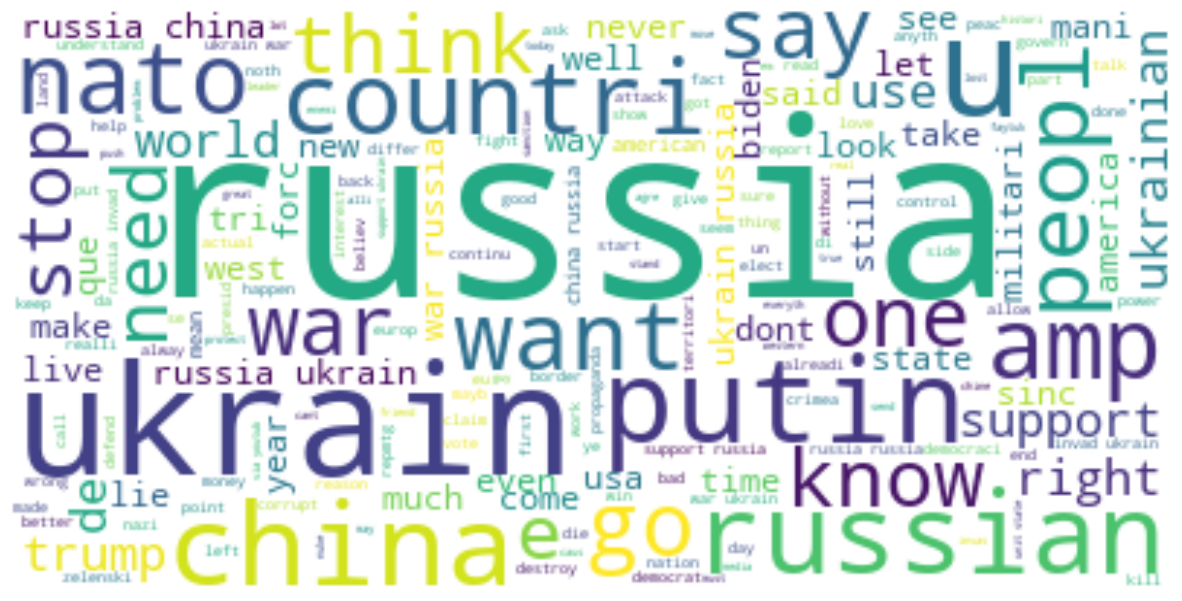

In [11]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code creates a word cloud visualization using the tweets in the "data" dataframe after applying a cleaning function that removes punctuation, numbers, and common words. The resulting word cloud displays the most frequently occurring words in the tweets, with larger font size indicating higher frequency.

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3       mainelif baddcompani it alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


The code uses the NLTK Vader lexicon to calculate the sentiment scores (positive, negative, and neutral) for each tweet in the dataset. The resulting scores are added as new columns to the data frame and displayed in the output

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


This code uses the VADER sentiment analyzer from the Natural Language Toolkit (nltk) to calculate positive, negative, and neutral scores for each tweet in the dataset. These scores indicate the overall sentiment of the tweet, where a positive score indicates a positive sentiment, a negative score indicates a negative sentiment, and a neutral score indicates a lack of strong sentiment. The code then creates new columns in the dataset to store these scores.






In [42]:
# perform sentiment analysis and store the scores in new columns
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

# store the sentiment scores in a new csv file
data.to_csv('sentiment_scores.csv', index=False)# perform sentiment analysis and store the scores in new columns
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

# store the sentiment scores in a new csv file
data.to_csv('sentiment_scores.csv', index=False)

The code performs sentiment analysis on the tweets in the dataset using the VADER sentiment analysis tool from NLTK. It calculates the positive, negative, and neutral scores for each tweet and stores them in new columns in the dataset. Finally, it saves the updated dataset as a new csv file named "sentiment_scores.csv".

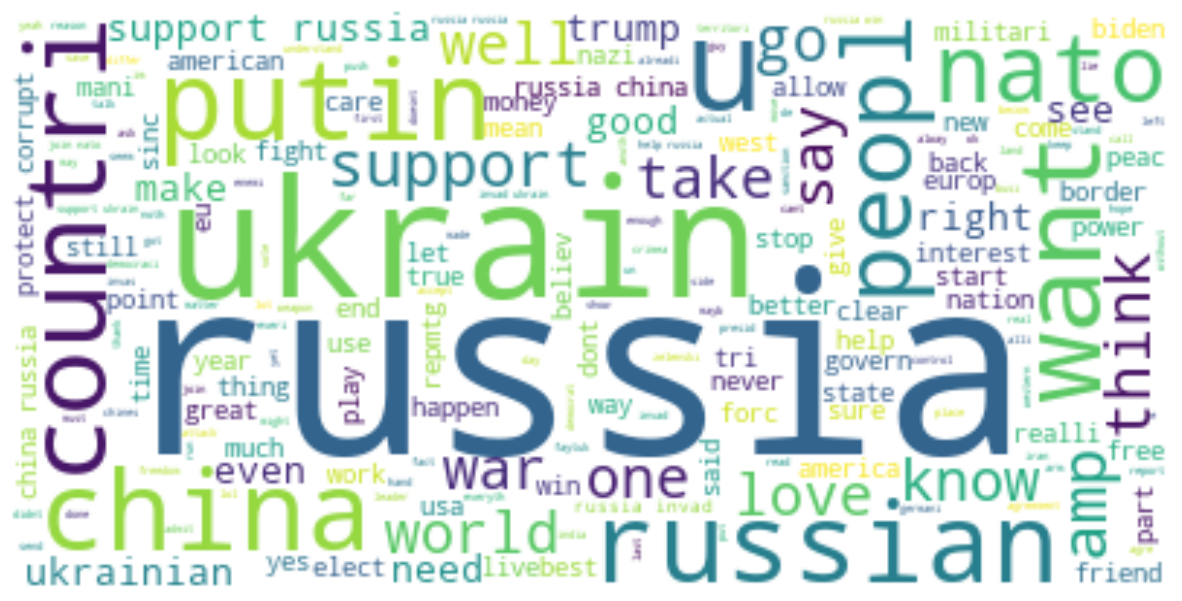

In [13]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code generates a word cloud visualization of the most frequent words in the tweets with a positive sentiment. It first filters the tweets with a positive sentiment score higher than the negative score and then creates a word cloud with the resulting text. The size of the words in the cloud reflects their frequency in the text.






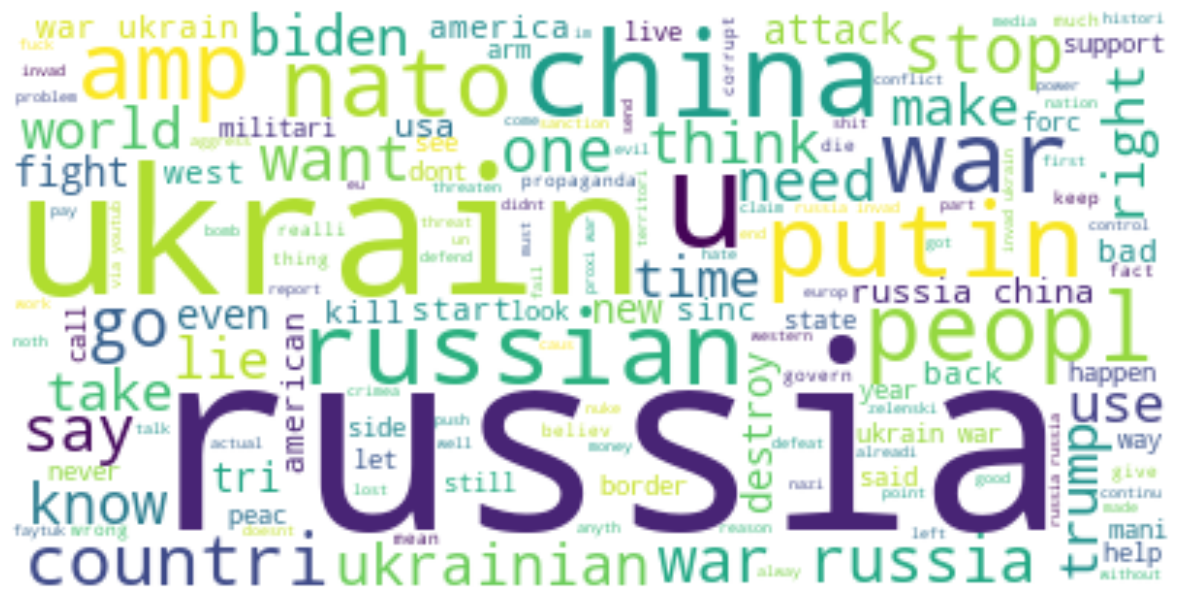

In [14]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code generates a wordcloud visualization of the words that appear most frequently in the negative sentiment tweets from the data dataframe. The negative sentiment tweets are selected using the condition data['Negative'] > data["Positive"]. The stopwords are removed from the text and the wordcloud is plotted using the WordCloud package with a white background color.

In [45]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Russia Ukraine  War Dataset\filename.csv")


In [46]:
data2=pd.read_csv("sentiment_scores.csv")

In [47]:
data_daily.columns

Index(['id', 'conversation_id', 'timezone', 'user_id', 'replies_count',
       'retweets_count', 'likes_count', 'retweet', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [61]:
df = data2


In [62]:
df.index.duplicated().any()


False

In [63]:
df = df.reset_index(drop=True)


In [64]:
data2.columns

Index(['index', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Positive', 'Negative', 'Neutral'],
      dtype='object')

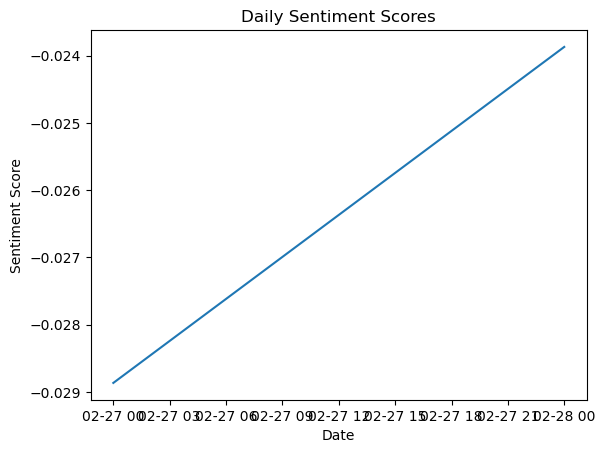

In [65]:
import pandas as pd


# Calculate sentiment scores
df['sentiment_score'] = (df['Positive'] - df['Negative']) / (df['Positive'] + df['Negative'] + df['Neutral'])

# Convert the 'created_at' column to datetime type
df['created_at'] = pd.to_datetime(df['created_at'])

# Set the 'created_at' column as the index
df = df.set_index('created_at')

# Resample the data to daily frequency and calculate the mean sentiment score
daily_sentiment = df['sentiment_score'].resample('D').mean()

# Plot the daily sentiment scores over time
import matplotlib.pyplot as plt

plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title('Daily Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()


The code calculates sentiment scores from a DataFrame containing tweets, based on the number of positive and negative words in each tweet. It then sets the time of the tweet as the index and resamples the data to daily frequency to calculate the mean sentiment score for each day. Finally, it plots a graph showing the daily sentiment scores over time.






In [73]:
df = pd.read_csv("sentiment_scores.csv", index_col='date', parse_dates=True)
df

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Positive,Negative,Neutral
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28,1630366235354451969,1630152070530576385,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,...,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN,0.189,0.000,0.811
2023-02-28,1630366226424778753,1630366226424778753,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000,0.308,0.692
2023-02-28,1630366225930027011,1630366225930027011,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,...,NaN,NaN,[],NaN,NaN,NaN,NaN,0.266,0.000,0.734
2023-02-28,1630366223056662530,1630351686974992385,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,...,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN,0.000,0.000,1.000
2023-02-28,1630366221483884545,1629903982255644672,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,@Pottingpinks @mfa_russia @mod_russia @mil_his...,...,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN,0.043,0.074,0.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,1630331110415646721,1630305860298633216,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,@wallacemick Its not Ukraine which investere w...,...,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN,0.000,0.281,0.719
2023-02-27,1630331106305122304,1630202100369043459,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,@tom_username_ There were very dark rumors tha...,...,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN,0.000,0.149,0.851
2023-02-27,1630331106296844288,1630301689818275840,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,@elonmusk If Russia lose the Rothschild are co...,...,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN,0.000,0.105,0.895


# Time Series Analysis

In [86]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load time series data
data = pd.read_csv('sentiment_scores.csv', index_col='date', parse_dates=True)

# Perform Dickey-Fuller test
result = adfuller(df['sentiment_score'])

# Print test statistic and p-value
print('Test statistic:', result[0])
print('P-value:', result[1])


Test statistic: -99.36017715974035
P-value: 0.0


This code loads a time series data that contains sentiment scores and performs the Dickey-Fuller test to check if the time series is stationary or not. The result of the test includes a test statistic and a p-value that can be used to determine the stationarity of the time series.






In [77]:
df['sentiment_score'] = (df['Positive'] - df['Negative']) / (df['Positive'] + df['Negative'] + df['Neutral'])


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:        sentiment_score   No. Observations:                10014
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4261.928
Date:                Mon, 08 May 2023   AIC                          -8517.857
Time:                        01:00:55   BIC                          -8496.222
Sample:                             0   HQIC                         -8510.534
                              - 10014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0069      0.010      0.705      0.481      -0.012       0.026
ma.L1         -0.9996      0.001  -1989.507      0.000      -1.001      -0.999
sigma2         0.0250      0.000     95.638      0.0

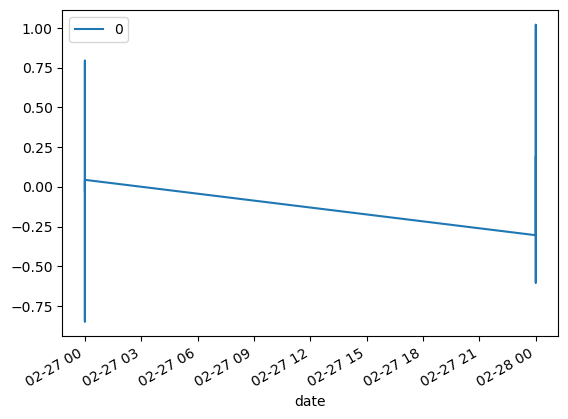

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


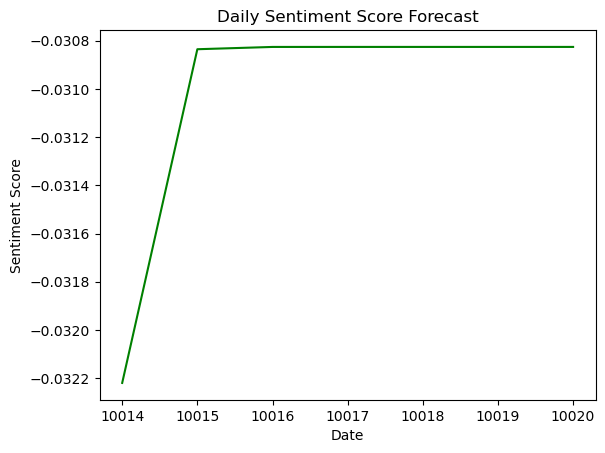

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the data
model = ARIMA(df['sentiment_score'], order=(1, 1, 1))
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()

# Generate predictions for the next 7 days
forecast = results.forecast(steps=7)

# Plot the forecast
plt.plot(forecast.index, forecast.values, color='green')
plt.title('Daily Sentiment Score Forecast')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()


This code is performing time series analysis using the ARIMA model on the sentiment score data. First, the ARIMA model is fit to the sentiment score data, and the model summary is printed. Then, the residuals are plotted. Next, the model is used to generate predictions for the next 7 days and the forecast is plotted. The purpose of this analysis is to forecast the sentiment score for the next 7 days based on historical sentiment data.


This output shows the results of an ARIMA(1,1,1) model applied to a time series of sentiment scores.

The coefficients for the autoregressive (AR) and moving average (MA) terms are both statistically insignificant (p-value > 0.05), meaning that they do not have a significant effect on the sentiment scores.

The variance of the residuals (sigma2) is estimated to be 0.025, indicating that the model explains about 97.5% of the variance in the data.

The Ljung-Box test (Q) and Jarque-Bera test (JB) are both significant, indicating that there is some evidence of residual autocorrelation and non-normality in the data, respectively. However, the magnitude of these test statistics is relatively small, so the model may still be adequate for practical purposes.

The Heteroskedasticity (H) test shows that there is no evidence of heteroscedasticity in the data.

Overall, the model appears to fit the data reasonably well, but there may be some room for improvement in terms of residual autocorrelation and non-normality.

In [79]:
df

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Positive,Negative,Neutral,sentiment_score
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28,1630366235354451969,1630152070530576385,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,...,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN,0.189,0.000,0.811,0.189
2023-02-28,1630366226424778753,1630366226424778753,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,...,NaN,[],NaN,NaN,NaN,NaN,0.000,0.308,0.692,-0.308
2023-02-28,1630366225930027011,1630366225930027011,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,...,NaN,[],NaN,NaN,NaN,NaN,0.266,0.000,0.734,0.266
2023-02-28,1630366223056662530,1630351686974992385,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,...,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN,0.000,0.000,1.000,0.000
2023-02-28,1630366221483884545,1629903982255644672,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,@Pottingpinks @mfa_russia @mod_russia @mil_his...,...,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN,0.043,0.074,0.883,-0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,1630331110415646721,1630305860298633216,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,@wallacemick Its not Ukraine which investere w...,...,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN,0.000,0.281,0.719,-0.281
2023-02-27,1630331106305122304,1630202100369043459,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,@tom_username_ There were very dark rumors tha...,...,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN,0.000,0.149,0.851,-0.149
2023-02-27,1630331106296844288,1630301689818275840,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,@elonmusk If Russia lose the Rothschild are co...,...,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN,0.000,0.105,0.895,-0.105


In [82]:
# Generate predictions for the test data
start_idx = len(df) - 7  # start predicting from the last 7 observations
end_idx = len(df) - 1
predictions = results.predict(start=start_idx, end=end_idx, typ='levels')

# Calculate the mean squared error
mse = mean_squared_error(df['sentiment_score'][start_idx:end_idx+1], predictions)

# Print the mean squared error
print('Mean Squared Error:', mse)


Mean Squared Error: 0.030594110174975157


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


This code is using an ARIMA model to make predictions on a time series data of sentiment scores. It is fitting the model, printing its summary and plotting its residuals. It is then generating predictions for the next 7 days and plotting the forecast. Finally, it is calculating the mean squared error of the predictions.

In [83]:
# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the root mean squared error
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.1749117210908839


The root mean squared error is a measure of how well the predictions of the ARIMA model fit the actual sentiment scores. It is calculated by taking the square root of the mean squared error. A lower value of root mean squared error indicates better performance of the model.

# Topic Modelling

In [87]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models

In [92]:
df2.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Positive', 'Negative', 'Neutral'],
      dtype='object')

In [93]:
df2= pd.read_csv(r"C:\Users\HP\Downloads\Russia Ukraine  War Dataset\filename.csv")


In [94]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [97]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [98]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Remove non-alphabetic characters
    words = [word for word in words if word.isalpha()]
    # Join words into a single string
    text = ' '.join(words)
    return text


This is a Python function that can be used to preprocess text data. It performs several text cleaning steps such as removing URLs, converting text to lowercase, tokenizing words, removing stopwords, removing non-alphabetic characters, and joining words into a single string. These steps are commonly used in natural language processing to prepare text data for further analysis or modeling.






In [99]:
df2['text_processed'] = df2['tweet'].apply(preprocess_text)


In [101]:
texts = [text.split() for text in df2['text_processed']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [106]:
df2['text_processed'] = df2['text_processed'].apply(lambda x: x.split())


In [107]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df2['text_processed']]


In [110]:
# Define the number of topics
num_topics = 3

# Apply the LDA algorithm
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(num_topics=num_topics):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.020*"russia" + 0.018*"children" + 0.011*"de" + 0.010*"rússia" + 0.009*"middle" + 0.009*"low" + 0.009*"e" + 0.009*"place" + 0.009*"regime" + 0.009*"child"
Topic: 1 
Words: 0.067*"russia" + 0.026*"ukraine" + 0.019*"war" + 0.013*"china" + 0.006*"us" + 0.006*"putin" + 0.006*"would" + 0.006*"russian" + 0.006*"enemy" + 0.005*"countries"
Topic: 2 
Words: 0.032*"russia" + 0.009*"economy" + 0.009*"know" + 0.009*"given" + 0.009*"imperialist" + 0.009*"country" + 0.009*"every" + 0.009*"communist" + 0.009*"italy" + 0.009*"path"


The output shows 3 different topics with each topic consisting of a group of words and their corresponding weights. The words in each topic seem to relate to a particular theme or concept, such as Russia's involvement in politics, war, and the economy. The weights indicate how important each word is within the topic. However, some of the words may not clearly relate to each other or the topic.